# 09_04: Estimating sampling errors with Monte Carlo

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
poll = pd.read_csv('poll.csv')
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [3]:
poll.value_counts(normalize=True)

vote 
Brown    0.511
Green    0.489
Name: proportion, dtype: float64

In [4]:
def makepoll(nsample=1000, brown=0.51):
    return pd.DataFrame({'vote': np.random.choice(['Brown', 'Green'], nsample, p=[brown, 1.0 - brown])})

In [5]:
makepoll().value_counts(normalize=True)

vote 
Brown    0.501
Green    0.499
Name: proportion, dtype: float64

In [6]:
makepoll().value_counts(normalize=True)

vote 
Green    0.505
Brown    0.495
Name: proportion, dtype: float64

In [7]:
def makedist(ntries=2000, nsample=1000, brown=0.51):
    return pd.DataFrame([makepoll(nsample, brown).value_counts(normalize=True) for i in range(ntries)])

In [8]:
counts = makedist()

In [9]:
counts

vote,Green,Brown
proportion,0.515,0.485
proportion,0.503,0.497
proportion,0.477,0.523
proportion,0.499,0.501
proportion,0.469,0.531
...,...,...
proportion,0.477,0.523
proportion,0.505,0.495
proportion,0.510,0.490
proportion,0.485,0.515


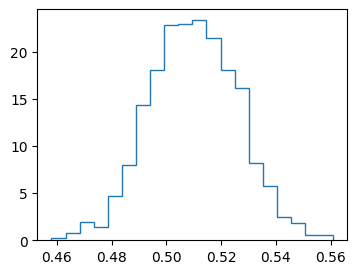

In [10]:
pp.figure(figsize=(4,3))
pp.hist(counts['Brown'], histtype='step', bins=20, density=True);

In [11]:
counts.Brown.describe()

vote,Brown
count,2000.000000
mean,0.510081
std,0.016027
min,0.458000
25%,0.499000
50%,0.510000
75%,0.521000
max,0.561000


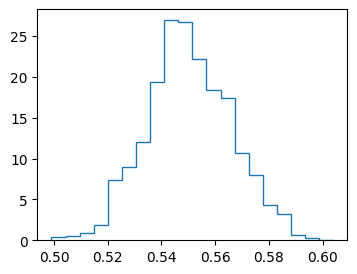

In [12]:
pp.figure(figsize=(4,3))
pp.hist(makedist(ntries=2000, nsample=1000, brown=0.55)['Brown'], histtype='step', bins=20, density=True);

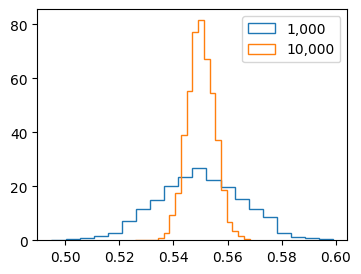

In [13]:
pp.figure(figsize=(4,3))
pp.hist(makedist(ntries=2000, nsample=1000, brown=0.55)['Brown'], histtype='step', bins=20, density=True, label='1,000')
pp.hist(makedist(ntries=2000, nsample=10000, brown=0.55)['Brown'], histtype='step', bins=20, density=True, label='10,000')
pp.legend();

In [14]:
makedist(ntries=2000, nsample=1000, brown=0.55)['Brown'].quantile(0.025)

vote 
Brown    0.52
Name: 0.025, dtype: float64

In [15]:
makedist(ntries=2000, nsample=1000, brown=0.54)['Brown'].quantile(0.025)

vote 
Brown    0.508
Name: 0.025, dtype: float64

In [16]:
makedist(ntries=2000, nsample=1000, brown=0.47)['Brown'].quantile(0.975)

vote 
Brown    0.501
Name: 0.975, dtype: float64

In [17]:
makedist(ntries=2000, nsample=1000, brown=0.48)['Brown'].quantile(0.975)

vote 
Brown    0.51
Name: 0.975, dtype: float64